In [1]:
#cleaning texts
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
data = pd.read_csv("D:/DATA SCIENCE/EXCELR/PROJECT/PROJECT 2/output.txt")

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['Class'] = encoder.fit_transform(data['Class'])
data


data = data.drop(['Unnamed: 0', 'filename' ,'Message-ID'], axis = 1)

data.duplicated().sum()

data = data.drop_duplicates(keep = 'first')
data

data.reset_index(drop=True, inplace=True)


In [3]:
import re #regular expression
import string

def clean_text(text):
    '''
    Make text lowercase, remove text in square brackets,
    remove punctuation and remove words containing numbers.
    '''
    text = text.lower()
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n*\r\n*', '', text)
    text = re.sub('\t*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    
    return text

clean = lambda x: clean_text(x)



data['content'] = data['content'].apply(clean)
data['content']



0        eat shit john j lavoratoexcelr   pm to john ar...
1                                                 fuck you
2        gentlemen the following champagne is available...
3        sorry ive taken so longjust been trying to fen...
4        asshole john j lavoratoexcelr   am to john arn...
                               ...                        
24595    do you need new leads for your business  do yo...
24596       garth brooks wrapped up in you    win ticke...
24597     dear smartreminders member  franchoice is a f...
24598        kid rock forever  official kid rock site w...
24599    you received this email because you registered...
Name: content, Length: 24600, dtype: object

In [4]:

nltk.download('stopwords')

data = data.iloc[:, 0:2]
data



stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data


data['content'] = data['content'].apply(lambda x: stemming(x))


data['content']



content = list(data['content'])
content

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vrund\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['eat shit john j lavoratoexcelr   pm to john arnoldhouectect cc subject football bets  each minn  buff  phil  indi  cinnci  det  clev  den  dall  jack ',
 'fuck you',
 'gentlemen the following champagne is available at  of approximate retail price also have interest in trading for red wine retail prices derived from specs website or winesearcercom wine has been stored at temperature controlled private wine storage facility quan vintage wine retail   perrier jouet brut fleur de champagne    piper heidsek reserve    dom perignon    veuve cliquot ponsardin la grande dame    taittenger millesine brut    jacquart millesine    roederer cristal  any interest',
 'sorry ive taken so longjust been trying to fend off the chicks life is sooooo hard sometimes monkey  from brian orourkeexcelr communications on   am to john arnoldhouectect cc subject yeah monkey monkey hey you little bastard what the fuck are you doing in a picture in ecompany what do you think that should help you score women how d

In [5]:
cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(content).toarray()
y = data.iloc[:, -1].values

## Balancing the imbalanced data
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# splitting the data set into training set and test set
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [6]:
# fitting naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
 
classifier = GaussianNB();
classifier.fit(X_train, y_train)

# predicting test set results
y_pred = classifier.predict(X_test)

# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)



print('Accuracy of naive bayes classifier on training set: {:.2f}'
      .format(classifier.score(X_train, y_train)))
print('Accuracy of naive bayes classifier on test set: {:.2f}'
      .format(classifier.score(X_test, y_test)))


[[6721  205]
 [1332 5518]]
0.8884291521486644
Accuracy of naive bayes classifier on training set: 0.89
Accuracy of naive bayes classifier on test set: 0.89


In [7]:

from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB();
classifier.fit(X_train, y_train)

# predicting test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

print('Accuracy of naive bayes classifier on training set: {:.2f}'
      .format(classifier.score(X_train, y_train)))
print('Accuracy of naive bayes classifier on test set: {:.2f}'
      .format(classifier.score(X_test, y_test)))


[[5299 1627]
 [ 277 6573]]
0.8617886178861789
Accuracy of naive bayes classifier on training set: 0.86
Accuracy of naive bayes classifier on test set: 0.86


In [8]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print('Accuracy of XGBOOST classifier on training set: {:.2f}'
      .format(model.score(X_train, y_train)))
print('Accuracy of XGBOOST classifier on test set: {:.2f}'
      .format(model.score(X_test, y_test)))

Accuracy: 92.70%
Accuracy of XGBOOST classifier on training set: 0.93
Accuracy of XGBOOST classifier on test set: 0.93


In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = classifier.predict_proba(np.array(X_test))[:,1]
y_pred_proba

array([1.92895918e-13, 1.71051050e-03, 7.25948318e-76, ...,
       8.01715054e-02, 1.00000000e+00, 1.00000000e+00])

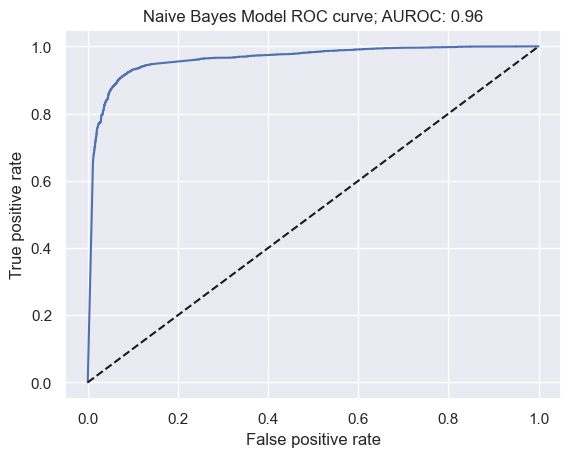

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)
plt.title(f'Naive Bayes Model ROC curve; AUROC: {AUROC}');
plt.show()

Text(0.5, 1.0, 'Precision Recall Curve. AUPRC: 0.9599471173544112')

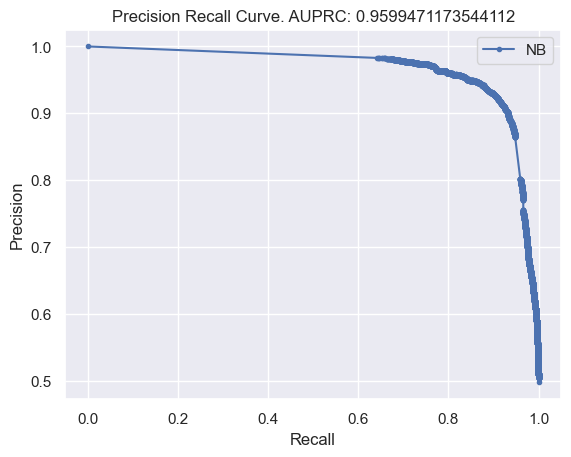

In [11]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred_proba)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.', label='NB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')

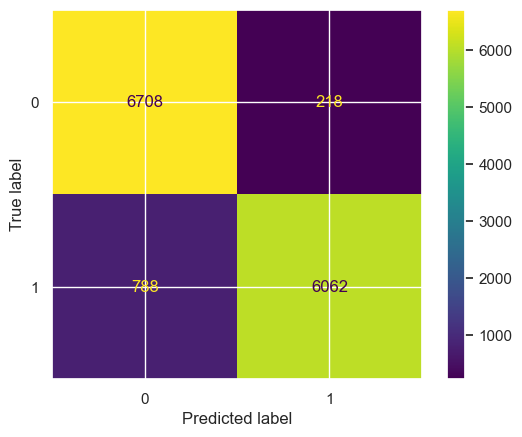

In [12]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
  
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=[0, 1])
  
cm_display.plot()
plt.show()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6926
           1       0.97      0.88      0.92      6850

    accuracy                           0.93     13776
   macro avg       0.93      0.93      0.93     13776
weighted avg       0.93      0.93      0.93     13776



In [14]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.853877739689052

In [15]:
import pickle 
pickle.dump(cv,open('P242_cv.sav','wb'))
pickle.dump(model, open('P242.sav', 'wb'))